In [1]:
# loading cleaned weather dataset
import pandas as pd
import numpy as np
df = pd.read_csv('cleaned_data.csv')
df.head()

,datetime,city,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,Portland,96.0,1017.0,35.582,3.0,160.0,45.523449,-122.676208,foggy
1,2017-01-01 01:00:00,Portland,96.0,1016.0,35.852,2.0,200.0,45.523449,-122.676208,rainy
2,2017-01-01 02:00:00,Portland,99.0,1015.0,35.600,3.0,221.0,45.523449,-122.676208,foggy
3,2017-01-01 03:00:00,Portland,99.0,1014.0,35.312,2.0,170.0,45.523449,-122.676208,rainy
4,2017-01-01 04:00:00,Portland,99.0,1013.0,34.826,1.0,210.0,45.523449,-122.676208,rainy


In [2]:
# filtering denver data
denver_df = df[df['city'] == 'Denver']
# dropping city as only denver data is present and resetting the index
denver_df = denver_df.drop(columns = ['city']).reset_index(drop=True)
denver_df

,datetime,humidity,pressure,temperature,wind_speed,wind_direction,latitude,longitude,weather
0,2017-01-01 00:00:00,36.0,1006.0,37.814,3.0,10.0,39.739151,-104.984703,clear
1,2017-01-01 01:00:00,36.0,1006.0,29.174,2.0,340.0,39.739151,-104.984703,cloudy
2,2017-01-01 02:00:00,68.0,1008.0,28.418,1.0,189.0,39.739151,-104.984703,clear
3,2017-01-01 03:00:00,79.0,1008.0,26.924,1.0,210.0,39.739151,-104.984703,clear
4,2017-01-01 04:00:00,79.0,1008.0,25.142,1.0,189.0,39.739151,-104.984703,clear
...,...,...,...,...,...,...,...,...,...
7988,2017-11-29 20:00:00,18.0,1016.0,61.538,3.0,310.0,39.739151,-104.984703,cloudy
7989,2017-11-29 21:00:00,12.0,1018.0,63.590,6.0,300.0,39.739151,-104.984703,clear
7990,2017-11-29 22:00:00,15.0,1018.0,61.808,3.0,340.0,39.739151,-104.984703,clear
7991,2017-11-29 23:00:00,28.0,1020.0,60.836,1.0,10.0,39.739151,-104.984703,foggy


In [3]:
# creating a function to label data based on weather description
def weather_labels(description):
    if 'clear' in description:
        return 'clear'
    else:
        return 'not clear'

In [4]:
# applying weather_labels function
denver_df['weather'] = denver_df['weather'].apply(weather_labels)
denver_df.weather.value_counts()

weather
clear        4161
not clear    3832
Name: count, dtype: int64

In [5]:
# converting weather into category type
denver_df['weather'] = denver_df['weather'].astype('category')
denver_df.dtypes

datetime            object
humidity           float64
pressure           float64
temperature        float64
wind_speed         float64
wind_direction     float64
latitude           float64
longitude          float64
weather           category
dtype: object

In [6]:
# In Python - the Naive Bayes work ONLY on quantitative data
x = denver_df.drop(columns=['datetime', 'latitude', 'longitude', 'weather'])
y = denver_df['weather']

In [7]:
from sklearn.model_selection import train_test_split
# creating disjoint train and test data
# using stratified sampling to ensure that each class is represented proportionally in both sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

In [8]:
y_train.value_counts()

weather
clear        3320
not clear    3074
Name: count, dtype: int64

In [9]:
y_test.value_counts()

weather
clear        841
not clear    758
Name: count, dtype: int64

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# instantiating the model.
# there are negative values in temperature. So multinomail NB will not work. use Gaussian NB
MyNB= GaussianNB()

# training the model
MyNB = MyNB.fit(x_train, y_train)

# predicting the label on test data
y_pred = MyNB.predict(x_test)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy =", accuracy )

Accuracy = 0.6685428392745466


In [29]:
print("\nThe prediction from NB is:")
print(y_pred)
print("\nThe actual labels are:")
print(y_test)


The prediction from NB is:
['clear' 'not clear' 'clear' ... 'not clear' 'not clear' 'clear']

The actual labels are:
3015    not clear
599         clear
415         clear
1708    not clear
3927        clear
          ...    
5925    not clear
7432    not clear
7499    not clear
315         clear
7677        clear
Name: weather, Length: 1599, dtype: category
Categories (2, object): ['clear', 'not clear']


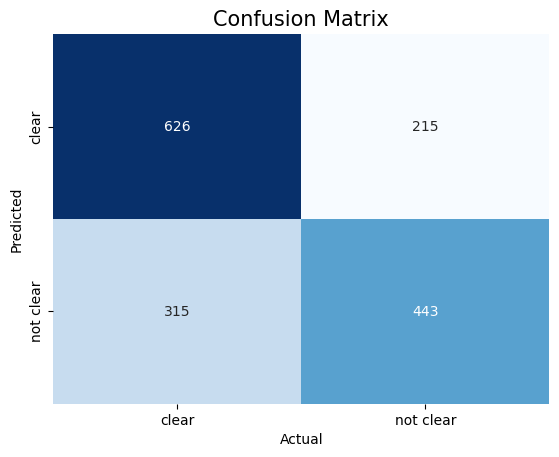

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = y.unique()
MyNB_cm = confusion_matrix(y_test, y_pred)

# if only first row values are annotated then upgrade your seaborn
# pip install seaborn --upgrade
sns.heatmap(MyNB_cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Actual", fontsize=10)
plt.ylabel("Predicted", fontsize=10)
plt.show()

In [28]:
# prediction probabilities
# columns are the labels in alphabetical order
# The decimal in the matrix are the prob of being that label
pred_probs = MyNB.predict_proba(x_test)
pred_probs_df = pd.DataFrame(pred_probs, columns=['clear', 'not clear'])
pred_probs_df.head()

,clear,not clear
0,0.730224,0.269776
1,0.432377,0.567623
2,0.519946,0.480054
3,0.320041,0.679959
4,0.778027,0.221973
